# **1. 결정 트리**

('/content/drive/MyDrive/car_evaluation.csv')

- 3주차 branch에 있는 `car_evaluation.csv`를 다운받은 후 실습을 진행해 주세요.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **1-a. 'car_evaluation.csv'를 불러와 df에 저장해 주세요.**

In [3]:
## Colab - 구글 드라이브 마운트
# Colab을 사용하시는 분들만 실행시켜 주시면 됩니다.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv')

## **1-b. df의 상위 5개 행을 확인해 주세요.**

In [5]:
print(df.head(5))

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


## **1-c. ```info()```를 통해 데이터 정보를 확인해 주세요.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## **1-d. 컬럼명이 적절해 보이지 않네요. 컬럼명을 알맞게 변경해 주세요.**


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [8]:
# 데이터 재확인

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-e. 범주형 변수에 대해 Label Encoding을 수행해 주세요.**
- Hint: 파머완 p.118, 121~122

In [9]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 리스트
cat = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# LabelEncoder 객체 생성
label_encoders = {}

# 각 범주형 변수에 대해 레이블 인코딩 수행
for feature in cat:
  label_encoder = LabelEncoder()
  df[feature] = label_encoder.fit_transform(df[feature])
  label_encoders[feature] = label_encoder

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


## **1-f. Feature(X)와 Target(y)를 분리해 주세요.**
- target(y) 변수: class

In [11]:
X = df.drop('class', axis=1)  # 'class' 열을 제외한 모든 열을 Feature로 사용
y = df['class']  # 'class' 열을 Target으로 사용

## **1-g. ```train_test_split()```을 사용하여 훈련 세트와 테스트 세트로 나눠주세요.**
(random_state = 42, train: test = 8:2)

In [12]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 나눈 데이터의 크기 확인
print("훈련 세트 X의 크기:", X_train.shape)
print("테스트 세트 X의 크기:", X_test.shape)
print("훈련 세트 y의 크기:", y_train.shape)
print("테스트 세트 y의 크기:", y_test.shape)

훈련 세트 X의 크기: (1381, 6)
테스트 세트 X의 크기: (346, 6)
훈련 세트 y의 크기: (1381,)
테스트 세트 y의 크기: (346,)


## **1-h. ```DecisionTreeClassifier```를 사용해 훈련 데이터를 fit 한 후, 테스트 데이터로 예측의 정확도를 구하세요.**
(DecisionTreeClassifer의 random_state = 42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 예측 정확도:", accuracy)

테스트 데이터 예측 정확도: 0.9710982658959537


## **1-i. GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.**
- Hint: 파머완 p.113, 207


```
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}
```



In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
clf = DecisionTreeClassifier(random_state=42)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}

# 객체 초기화
grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#최적의 하이퍼 파라미터 조합 출력
print('최적 파라미터:', grid_search.best_params_)
# 최적의 모델 저장
best_clf = grid_search.best_estimator_


최적 파라미터: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


## **1-j. 최적화 된 모델로 테스트 데이터 세트에 대해 예측을 수행해 주세요.**

In [17]:
# 테스트 데이터로 예측 및 정확도 계산
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("최적 모델의 테스트 데이터 예측 정확도:", accuracy)

최적 모델의 테스트 데이터 예측 정확도: 0.9710982658959537


# **2. 서포트 벡터 머신**

## **2-a. split된 자동차 평가 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요.**
(C = 10)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [19]:
svm_model = SVC(C=10, kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("정확도:", accuracy_svm)

정확도: 0.7138728323699421


## **2-b. 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.**
(cv = 5)

In [20]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [21]:
svm_model = SVC(kernel='linear')
grid_search = GridSearchCV(estimator=svm_model, param_grid=param, cv=5)

# 훈련 데이터로 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 조합 출력
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("최적의 C 값:", best_params['C'])
print("최고 score:", best_score)

최적의 C 값: 5
최고 score: 0.7299011144247369


## **2-c. 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.**
Hint: `best_estimator_`

In [22]:
# GridSearchCV에서 찾은 최적의 모델 가져오기
best_svm_model = grid_search.best_estimator_

y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print("정확도:", accuracy_svm_best)

정확도: 0.708092485549133


## **2-d. GridSearchCV를 이용하여 최적의 `gamma`, `C` 값을 찾아 최적 가우시안 SVM 모델을 만들고, fit 하세요.**
(가우시안 svm: kernel = 'rbf')

In [23]:
params = {'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 0.5, 1, 5, 10, 40, 100],
              'gamma': [0.1, 0.25, 0.5, 0.75, 1, 10]}

rbf_svm_model = SVC(kernel='rbf')
grid_search_rbf = GridSearchCV(estimator=rbf_svm_model, param_grid=param_grid, cv=5)

grid_search_rbf.fit(X_train, y_train)

# 최적의 하이퍼파라미터 조합
best_params_rbf = grid_search_rbf.best_params_
print("최적의 C 값:", best_params_rbf['C'])
print("최적의 gamma 값:", best_params_rbf['gamma'])

# 최적 모델
best_rbf_svm_model = grid_search_rbf.best_estimator_
best_rbf_svm_model.fit(X_train, y_train)


최적의 C 값: 40
최적의 gamma 값: 0.25


SVC(C=40, gamma=0.25)

# **3. 앙상블**

## **3-a. breast_cancer 데이터셋을 ```load()``` 함수를 사용해서 불러온 후, 훈련 세트와 테스트 세트로 나눠주세요.**
(test_size = 0.2, random_state = 42)




In [25]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [26]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


## **3-b. 로지스틱 회귀, KNN, 결정 트리를 개별 모델로 사용하여 개별 모델의 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)
- 로지스틱 회귀: solver = "liblinear"
- KNN: n_neighbors = 16
- 결정 트리: random_state = 12

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
logistic_model = LogisticRegression(solver='liblinear')
knn_model = KNeighborsClassifier(n_neighbors=16)
decision_tree_model = DecisionTreeClassifier(random_state=12)

logistic_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

pred_logistic = logistic_model.predict(X_test)
pred_knn = knn_model.predict(X_test)
pred_decision_tree = decision_tree_model.predict(X_test)

#정확도 계산
accuracy_logistic = accuracy_score(y_test, pred_logistic)
accuracy_knn = accuracy_score(y_test, pred_knn)
accuracy_decision_tree = accuracy_score(y_test, pred_decision_tree)

print("로지스틱 회귀 모델의 정확도:", accuracy_logistic)
print("KNN 모델의 정확도:", accuracy_knn)
print("결정 트리 모델의 정확도:", accuracy_decision_tree)

로지스틱 회귀 모델의 정확도: 0.956140350877193
KNN 모델의 정확도: 0.9649122807017544
결정 트리 모델의 정확도: 0.9385964912280702


## **3-c. 로지스틱 회귀와 결정 트리를 기반으로 하여 '하드 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(solver="liblinear")
decision_tree_model = DecisionTreeClassifier(random_state=12)
# 하드 보팅 분류기 생성
voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('decision_tree', decision_tree_model)
], voting='hard')

# 하드 보팅 분류기를 훈련 데이터로 학습
voting_classifier.fit(X_train, y_train)

# 하드 보팅 분류기로 테스트 데이터 예측
y_pred_voting = voting_classifier.predict(X_test)

# 정확도 계산
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# 하드 보팅 분류기의 정확도 출력
print("하드 보팅 분류기의 정확도:", accuracy_voting)

하드 보팅 분류기의 정확도: 0.9298245614035088


## **3-d. KNN과 결정트리를 기반으로 하여 '소프트 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해보세요.**
(평가는 정확도가 출력되도록 해주세요.)

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=16)
decision_tree_model = DecisionTreeClassifier(random_state=12)

voting_classifier = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('decision_tree', decision_tree_model)
], voting='soft')

voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("소프트 보팅 분류기의 정확도:", accuracy_voting)

소프트 보팅 분류기의 정확도: 0.9385964912280702


# **4. 랜덤 포레스트**

## **4-a. RandomForestClassifier를 이용하여 훈련 데이터를 fit한 후, 테스트 셋으로 예측 정확도를 구하세요.**
(random_state = 42, max_depth = 8)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [37]:
rf_classifier = RandomForestClassifier(random_state=42, max_depth=8)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("정확도:", accuracy_rf)

정확도: 0.9649122807017544


## **4-b. GridSearchCV를 사용하여 최적의 하이퍼 파라미터 조합을 찾으세요.**
(cv = 2, n_jobs = -1)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [1, 2, 4,8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

In [40]:
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=params, cv=2, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
print("최적의 하이퍼파라미터 조합:", grid_search_rf.best_params_)

최적의 하이퍼파라미터 조합: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}


## **4-c. 위에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 정확도를 측정해 보세요.**


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 최적 하이퍼파라미터 조합
best_params_rf = {
    'n_estimators': 100,
    'max_depth': 12,
    'min_samples_leaf': 1,
    'min_samples_split': 8
}
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_classifier.fit(X_train, y_train)
y_pred_best_rf = best_rf_classifier.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("정확도:", accuracy_best_rf)

정확도: 0.9649122807017544


## **4-d. ```feature_importances_``` 속성을 이용하여 전체 feature의 피처 주요도를 막대 그래프로 시각화 해보세요.**
(index = cancer.feature_names)  
Hint: 파머완 p.210

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mean radius : 0.049
mean texture : 0.014
mean perimeter : 0.060
mean area : 0.050
mean smoothness : 0.006
mean compactness : 0.014
mean concavity : 0.067
mean concave points : 0.109
mean symmetry : 0.002
mean fractal dimension : 0.003
radius error : 0.022
texture error : 0.004
perimeter error : 0.008
area error : 0.021
smoothness error : 0.003
compactness error : 0.004
concavity error : 0.005
concave points error : 0.003
symmetry error : 0.002
fractal dimension error : 0.006
worst radius : 0.077
worst texture : 0.018
worst perimeter : 0.072
worst area : 0.155
worst smoothness : 0.011
worst compactness : 0.018
worst concavity : 0.034
worst concave points : 0.149
worst symmetry : 0.008
worst fractal dimension : 0.005


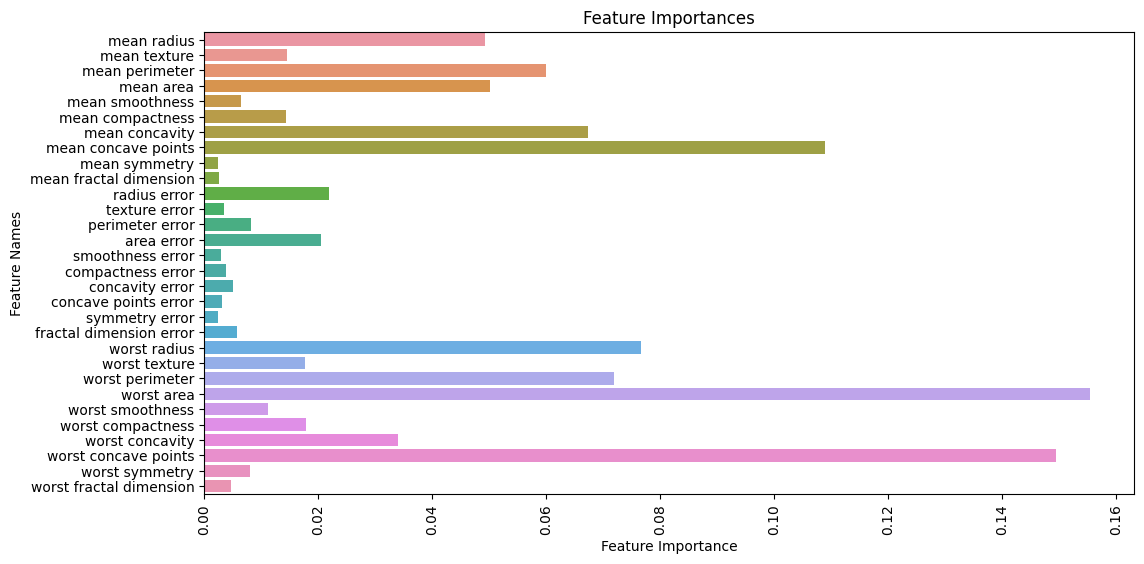

In [46]:
# Feature importance 추출
feature_importances = best_rf_classifier.feature_importances_

# 매핑 및 출력
for name, value in zip(cancer.feature_names, feature_importances):
    print(f'{name} : {value:.3f}')

# Feature importance를 column 별로 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=cancer.feature_names)
plt.title("Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.xticks(rotation=90)
plt.show()